# Problem
Company XYZ sells a software for \\$39 . Since revenue has been flat for some time, the VP of
Product has decided to run a test increasing the price. She hopes that this would increase
revenue. In the experiment, 66% of the users have seen the old price (\\$39), while a random
sample of 33% users a higher price (\\$59). The test has been running for some time and the VP of Product is interested in understanding how it went and whether it would make sense to increase the price for all the users.

Especially need to answer the following questions:

1. Should the company sell its software for \\$39 or \\$59?

2. The VP of Product is interested in having a holistic view into user behavior, especially focusing on actionable insights that might increase conversion rate. What are your main findings looking at the data?

3.  The VP of Product feels that the test has been running for too long and she should
have been able to get statistically significant results in a shorter time. Do you agree with her intuition? After how many days you would have stopped the test? Please, explain
why.

In [163]:
import pandas as pd
import numpy as np
results_data = pd.read_csv("test_results.csv")
user_data = pd.read_csv("user_table.csv")

In [91]:
results_data

,user_id,timestamp,source,device,operative_system,test,price,converted
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0
3,685636,2015-05-07 07:26:01,direct_traffic,mobile,iOS,1,59,0
4,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0
...,...,...,...,...,...,...,...,...
316795,17427,2015-04-11 09:29:15,ads_facebook,web,windows,0,39,0
316796,687787,2015-03-16 23:31:55,direct_traffic,web,windows,0,39,0
316797,618863,2015-04-11 01:35:19,ads-google,web,mac,0,39,0
316798,154636,2015-05-14 05:46:42,friend_referral,mobile,android,0,39,0


In [92]:
user_data

,user_id,city,country,lat,long
0,510335,Peabody,USA,42.53,-70.97
1,89568,Reno,USA,39.54,-119.82
2,434134,Rialto,USA,34.11,-117.39
3,289769,Carson City,USA,39.15,-119.74
4,939586,Chicago,USA,41.84,-87.68
...,...,...,...,...,...
275611,485975,Atlanta,USA,33.76,-84.42
275612,35479,Los Angeles,USA,34.11,-118.41
275613,516519,Chicago,USA,41.84,-87.68
275614,984877,Tampa,USA,27.96,-82.48


In [93]:
results_data.isnull().sum()

user_id             0
timestamp           0
source              0
device              0
operative_system    0
test                0
price               0
converted           0
dtype: int64

In [94]:
results_data['price'].value_counts()

39    202672
59    114128
Name: price, dtype: int64

In [95]:
results_data[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

user_id
test price         
0    39      202517
     59         210
1    39         155
     59      113918

It seems that there are some discrepancies with the column test and price. There are a small amount of users who are labelled with test=0 but actually see price \\$59. There are a small amount of users who are labelled with test=1 but actually see price \\$39.

Since we did not know the origin of the error and the size is not large, we can just delete those data.

In [96]:
correct_results1 = results_data[(results_data['test'] == 0) & (results_data['price'] == 39)] 
correct_results2 = results_data[(results_data['test'] == 1) & (results_data['price'] == 59)] 
clean_results = pd.concat([correct_results1,correct_results2] )

In [97]:
clean_results[['price', 'test', 'user_id']].groupby(['test', 'price']).count()

,,user_id
test,price,
0,39,202517
1,59,113918


In [98]:
clean_results[['price', 'converted', 'user_id']].groupby(['price', 'converted']).count()

user_id
price converted         
39    0           198487
      1             4030
59    0           112146
      1             1772

In [99]:
user_data.isnull().sum()

user_id    0
city       0
country    0
lat        0
long       0
dtype: int64

In [100]:
len(set(user_data['user_id']))

275616

In [101]:
len(set(clean_results['user_id']))

316435

In [102]:
combined_data = pd.merge(clean_results, user_data, on='user_id', how='left')

In [103]:
combined_data['revenue'] = combined_data['converted'] * combined_data['price']

In [104]:
combined_data

,user_id,timestamp,source,device,operative_system,test,price,converted,city,country,lat,long,revenue
0,604839,2015-05-08 03:38:34,ads_facebook,mobile,iOS,0,39,0,Buffalo,USA,42.89,-78.86,0
1,624057,2015-05-10 21:08:46,seo-google,mobile,android,0,39,0,Lakeville,USA,44.68,-93.24,0
2,317970,2015-04-04 15:01:23,ads-bing,mobile,android,0,39,0,Parma,USA,41.38,-81.73,0
3,820854,2015-05-24 11:04:40,ads_facebook,web,mac,0,39,0,Fishers,USA,39.95,-86.02,0
4,169971,2015-04-13 12:07:08,ads-google,mobile,iOS,0,39,0,New York,USA,40.67,-73.94,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
316430,190563,2015-05-17 12:03:19,seo_facebook,mobile,android,1,59,0,New Haven,USA,41.31,-72.92,0
316431,796427,2015-04-02 09:33:18,seo-google,web,windows,1,59,0,Norwalk,USA,33.91,-118.08,0
316432,964001,2015-05-05 13:31:19,ads_other,web,windows,1,59,0,Athens-Clarke,USA,33.95,-83.39,0
316433,388438,2015-05-20 11:34:44,seo-google,web,windows,1,59,0,Joliet,USA,41.53,-88.12,0


In [46]:
tmp = combined_data.groupby('test')['source'].apply(lambda x: x.value_counts()).unstack()
tmp

,ads-bing,ads-google,ads-yahoo,ads_facebook,ads_other,direct_traffic,friend_referral,seo-bing,seo-google,seo-other,seo-yahoo,seo_facebook
test,,,,,,,,,,,,
0,14584,37845,4812,34074,19256,38712,13121,1329,15088,5879,4356,13461
1,8247,21497,2759,19281,10570,21560,7557,815,8060,3365,2485,7722


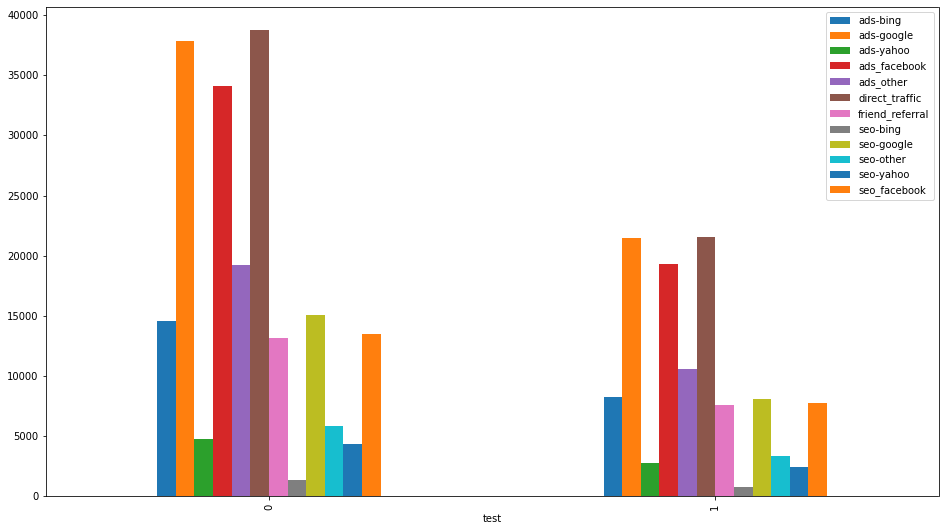

In [47]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
tmp.plot(kind='bar', ax=ax)
plt.show()

In [48]:
tmp = combined_data.groupby('test')['device'].apply(lambda x: x.value_counts()).unstack()
tmp

,mobile,web
test,,
0,120369,82148
1,65898,48020


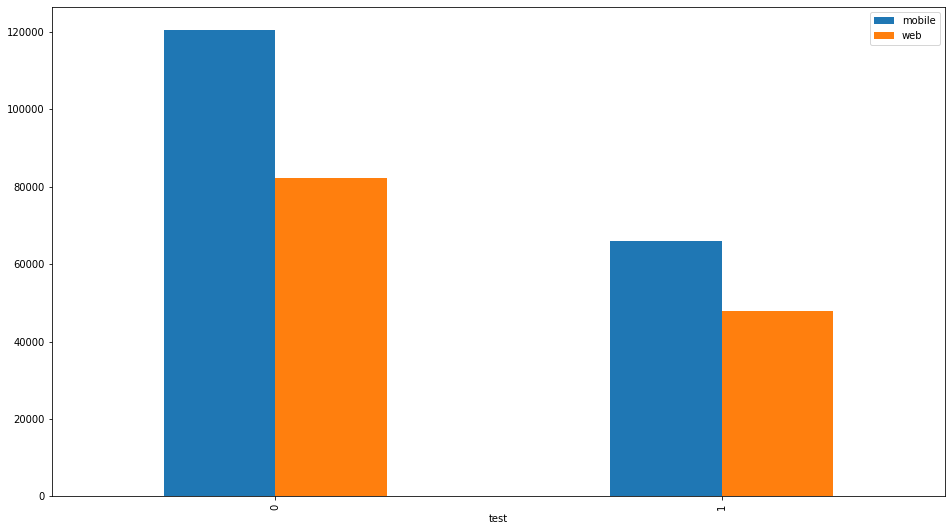

In [49]:
fig, ax = plt.subplots(figsize=(16, 9))
tmp.plot(kind='bar', ax=ax)
plt.show()

In [50]:
tmp = combined_data.groupby('test')['operative_system'].apply(lambda x: x.value_counts()).unstack()
tmp

,windows,iOS,android,mac,other,linux
test,,,,,,
0,63517,61793,48177,16345,10481,2204
1,37333,33560,26693,8710,5696,1926


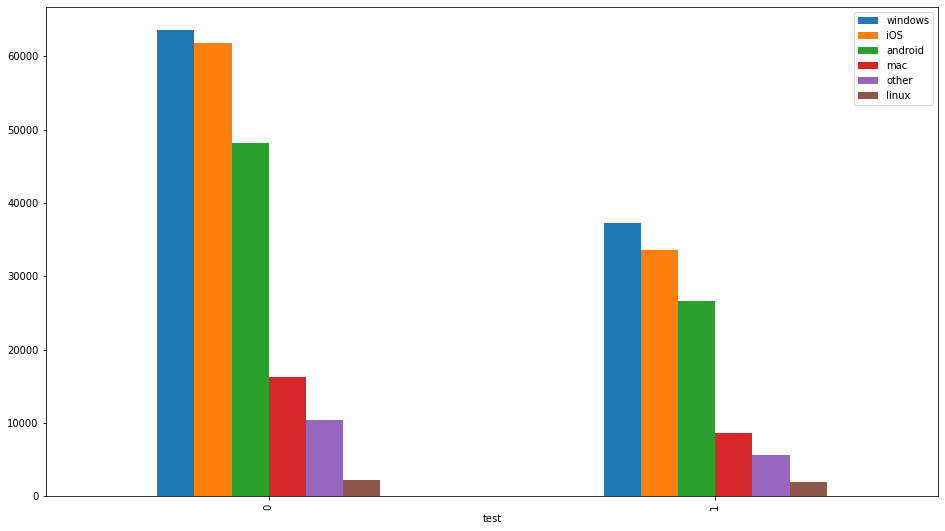

In [51]:
fig, ax = plt.subplots(figsize=(16, 9))
tmp.plot(kind='bar', ax=ax)
plt.show()

In [105]:
combined_data[['test', 'converted']].groupby('test').mean()

,converted
test,
0,0.019900
1,0.015555


In [106]:
combined_data[['test', 'revenue']].groupby('test').mean()

,revenue
test,
0,0.776083
1,0.917748


Clearly, for those with lower price \\$39, they have a higher conversion rate 1.990\%. For those with higher price \\$59, the conversion rate is 1.556\%. However, considering the price, the average revenue for higher price (0.918) is actually larger than the lower price (0.776).

Now, let's conduct hypothesis testing.

Null hypothesis H0: experimental group's average revenue is equal to or less than control group's average revenue

Alternative hypothesis H1: experimental group's average revenue is higher than control group's average revenue

In [107]:
from scipy.stats import ttest_ind
print(ttest_ind(combined_data[combined_data['test']== 0]['revenue'], combined_data[combined_data['test'] == 1]['revenue'], axis=0, equal_var=False))


Ttest_indResult(statistic=-5.715224666463108, pvalue=1.0972577312420781e-08)


We can reject the null hypothesis, and conclude that experimental group's average revenue is higher than control group's average revenue

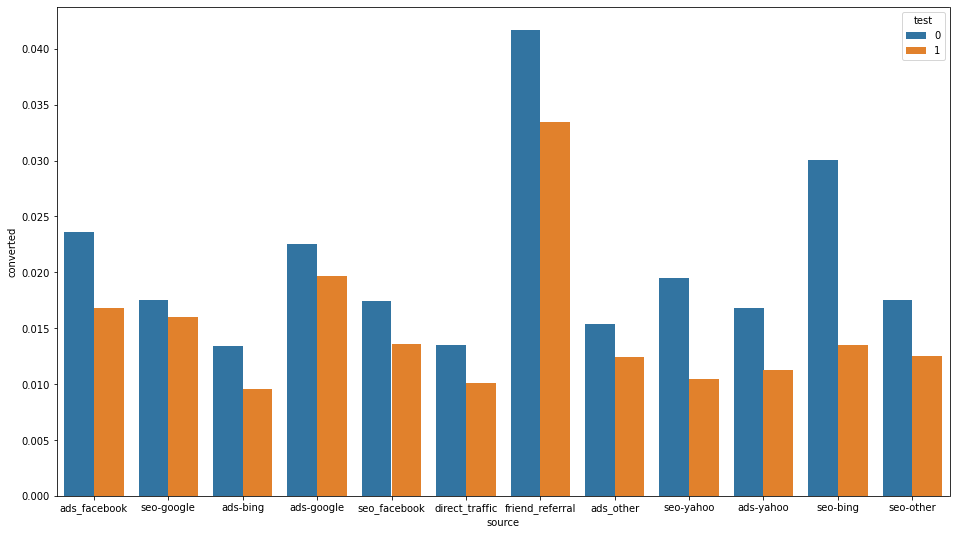

In [180]:
plt.figure(figsize=(16, 9))
sns.barplot(x='source', y='converted', hue='test', data=combined_data, ci=None)

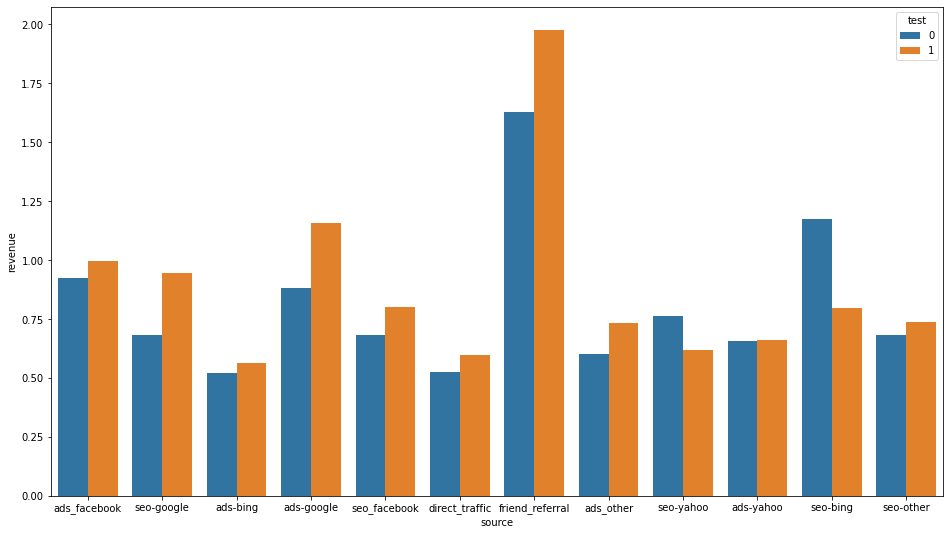

In [181]:
plt.figure(figsize=(16, 9))
sns.barplot(x='source', y='revenue', hue='test', data=combined_data, ci=None)

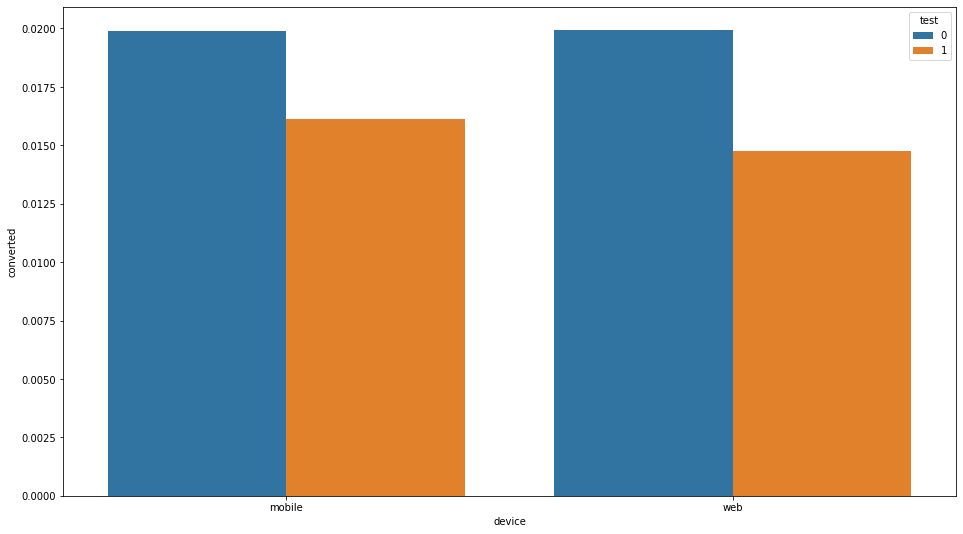

In [183]:
plt.figure(figsize=(16, 9))
sns.barplot(x='device', y='converted', hue='test', data=combined_data, ci=None)

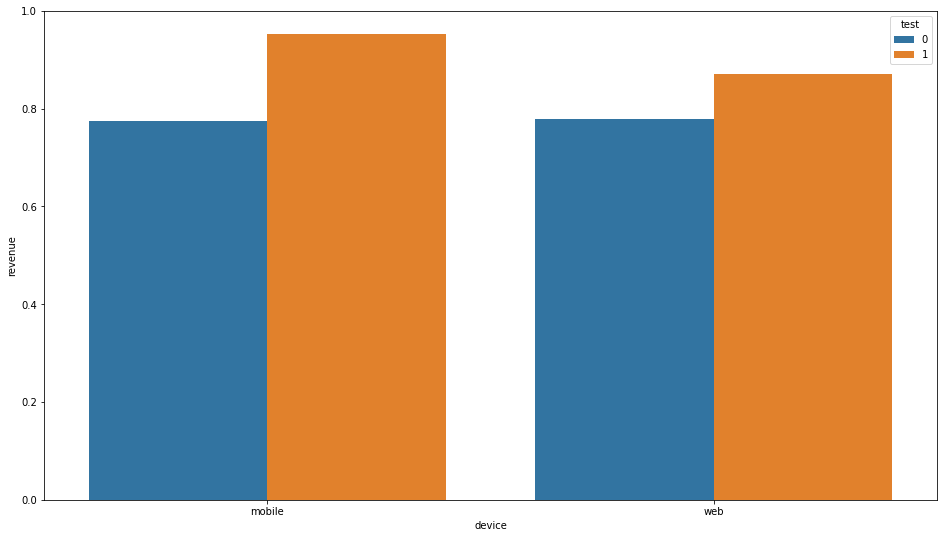

In [182]:
plt.figure(figsize=(16, 9))
sns.barplot(x='device', y='revenue', hue='test', data=combined_data, ci=None)

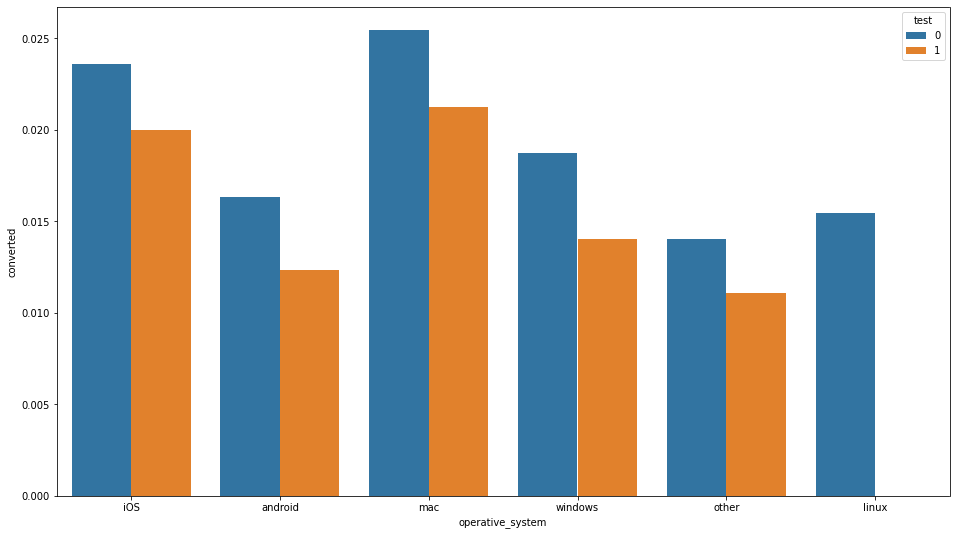

In [185]:
plt.figure(figsize=(16, 9))
sns.barplot(x='operative_system', y='converted', hue='test', data=combined_data, ci=None)

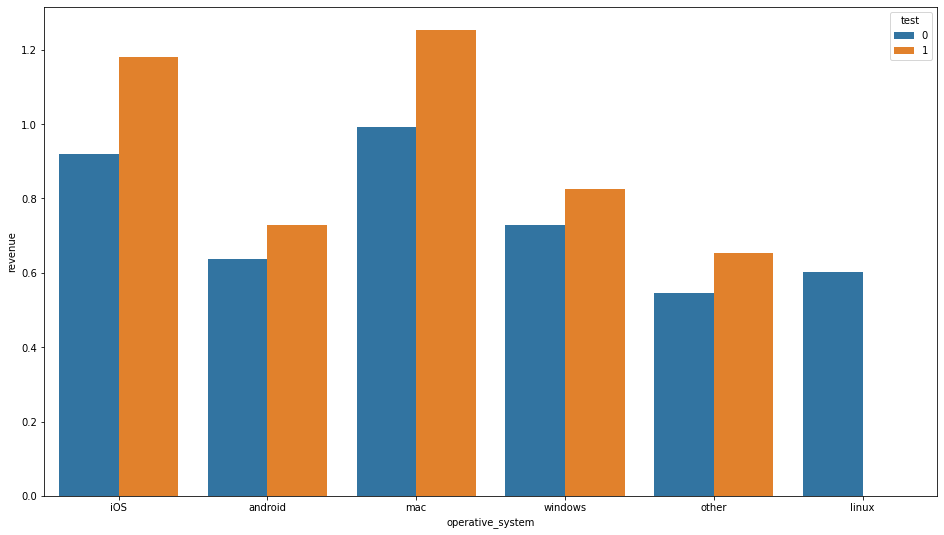

In [184]:
plt.figure(figsize=(16, 9))
sns.barplot(x='operative_system', y='revenue', hue='test', data=combined_data, ci=None)

Source: Friend-referral users have much higher conversion rate

Device: The influence of device is not significant

Operative System: Mac and ios users have much higher conversion rate

In [110]:
import re
combined_data['timestamp'] = combined_data['timestamp'].apply(lambda x: re.sub('60', '00', x)) 
combined_data['timestamp'] = pd.to_datetime(combined_data['timestamp'])
combined_data['date'] = combined_data['timestamp'].dt.date

In [130]:
data_test = combined_data[combined_data['test']==1]
data_control = combined_data[combined_data['test']==0]

In [146]:
grp_mean1 = data_test[['converted','date']].groupby('date').mean().reset_index()
grp_mean2 = data_control[['converted','date']].groupby('date').mean().reset_index()

In [147]:
grp_mean1

,date,converted
0,2015-03-02,0.015571
1,2015-03-03,0.010381
2,2015-03-04,0.013015
3,2015-03-05,0.022923
4,2015-03-06,0.016551
...,...,...
86,2015-05-27,0.023952
87,2015-05-28,0.026971
88,2015-05-29,0.015705
89,2015-05-30,0.016378


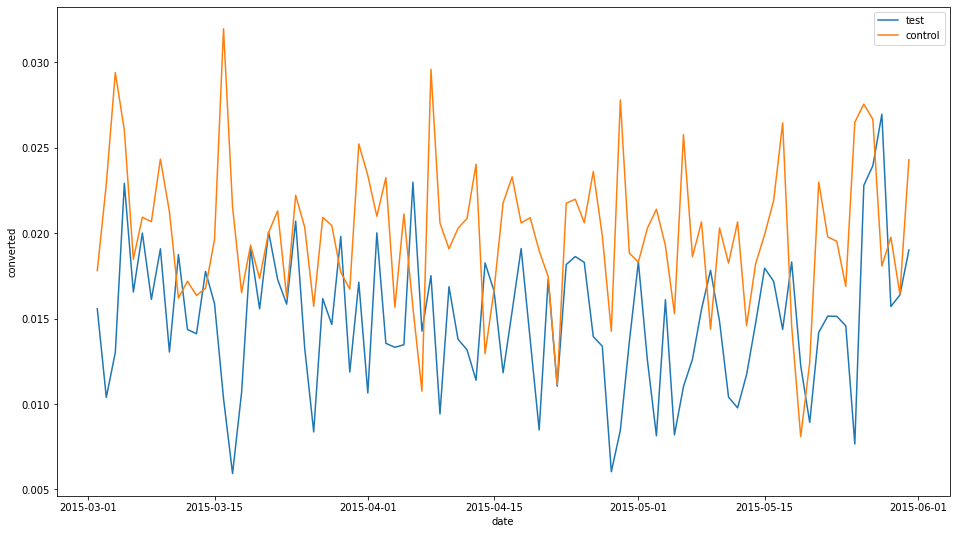

In [156]:
import seaborn as sns
plt.figure(figsize=(16,9))
sns.lineplot(x="date", y="converted", data=grp_mean1, label = 'test')
sns.lineplot(x="date", y="converted", data=grp_mean2, label = 'control')

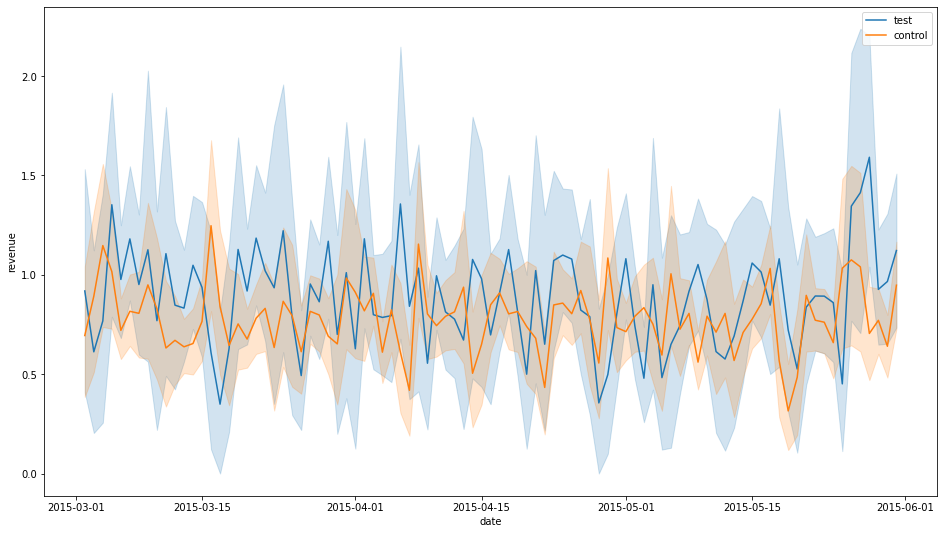

In [168]:
plt.figure(figsize=(16,9))
sns.lineplot(x="date", y="revenue", data=data_test, label = 'test')
sns.lineplot(x="date", y="revenue", data=data_control, label = 'control')

I would recommend to test to be shortened to 1-2 weeks since after that, there is no major change in test conversion rate pattern.